### Описание бизнес кейса

Вам будут даны несколько кейсов для разных бизнесов с описанием бизнес задачи, которую
необходимо решить:
#### Подведите результаты эксперимента в экселе по следующим данным: ab_stats.csv - Google Диск:
   
Стат значимо ли отличается ARPPU в двух группах ? Какие рекомендации дадите
менеджеру?

Описание бизнес кейса

1) Подведите результаты эксперимента в экселе по следующим данным: ab_stats.csv - Google Диск:
Стат значимо ли отличается ARPPU в двух группах ? Какие рекомендации дадите менеджеру?

2) Мы хотим провести А/Б-тест для трех источников трафика. Нынешняя конверсия равна 5%,
мы ожидаем прирост в 0,2%. Уровень доверия 97% и уровень мощности 87%.
Всего на наш продукт заходит 40 000 пользователей в месяц.

3) За сколько дней мы сможем протестировать гипотезу? И что вы можете посоветовать по
результатам подсчета?

3.1) Допустим в задаче нет проблемы с количеством посетителей на сайт, тогда подведите
результаты тестирования, если у нас следующие результаты по количеству конверсии:
- 25000
- 30000
- 32000

4) Вы решили сравнивать метрику CPA в двух группах. Размер выборки - 2350 элементов в
каждой группе. Для проверки нормальности распределения на выборке в 2350 наблюдений применили
критерий Шапиро-Уилка и получили p-value, равный 0.00002, alpha = 5%.
Какой бы вывод мы могли сделать в данном случае?
В этом случае какой статистический критерий для проверки первоначальной гипотезы тут лучше
всего подойдёт и почему ?

5) Мы провели АБ-тест на увеличение average timespent per user. По итогам тестирования мы
получили следующие данные. Является ли результат статистически значимым с уровнем доверия 80%? Какую версию мы выкатим на продакшн?
A) Средняя - 360, отклонение - 40, количество - 9802
B) Средняя - 352, отклонение - 58, количество - 9789

6) Создайте техническую архитектуру проекта по аб тестированию продукта он-лайн кинотеатра
с учетом кросс-девайс аналитики по следующей гипотезе:
Если договориться с банком о 99% кэшбэке на подписку первого месяца, то это повысит
конверсию в подписку на 30%, благодаря упрощенному принятию решения со стороны
пользователя.
На схеме необходимо отобразить:
1) Управленческий процесс по договоренностям с внешними партнерами
2) Архитектуру данных с указанием систем, из которых будем скачивать данные
3) Внутрикомандное взаимодействие

In [3]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import scipy.stats as stats
import urllib.request

In [4]:
import pandas as pd

data_path = r"ab_stats.csv"
data = pd.read_csv(data_path)

print("Размеры датасета", data.shape)
print(data.head(6))

Размеры датасета (23652, 5)
   revenue  num_purchases  purchase ab_group  av_site visit
0      0.0              0         0        A       9.040174
1      0.0              0         0        A       4.811628
2      0.0              0         0        A       7.342623
3      0.0              0         0        A       7.744581
4      0.0              0         0        A      10.511814
5      0.0              0         0        A       9.578727


T-статистика: 0.4444530186557162
P-значение: 0.6569385300804972
Разница в ARPPU между двумя группами не является статистически значимой.
Рекомендация: Так как разница не является статистически значимой, дополнительных изменений не требуется.


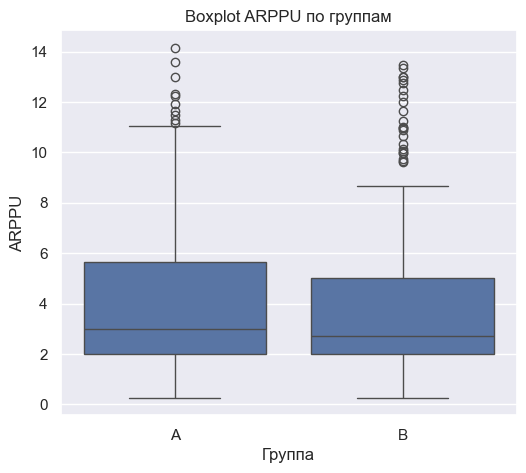

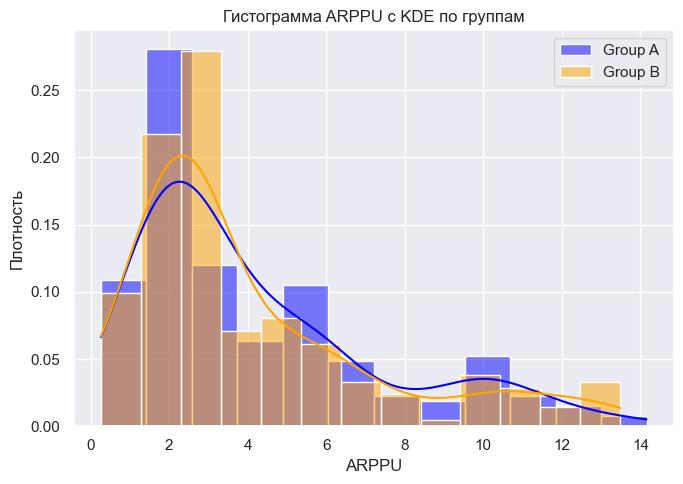

Результаты эксперимента сохранены в файл ab_test_results.xlsx


In [5]:
# Вычисление ARPPU для каждой записи
data['ARPPU'] = data['revenue'] / data['num_purchases']

# Удаление выбросов
def remove_outliers(df, column, threshold=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data_clean = remove_outliers(data, 'ARPPU')

# Разделение данных на две группы
group_a = data_clean[data_clean['ab_group'] == 'A']
group_b = data_clean[data_clean['ab_group'] == 'B']

# Разделение данных по группам для ARPPU
arppu_a = group_a['ARPPU'].dropna()
arppu_b = group_b['ARPPU'].dropna()

# Выполняем независимый t-тест для проверки значимости разницы в ARPPU между группами
t_stat, p_value = stats.ttest_ind(arppu_a, arppu_b, equal_var=False)

# Вывод результатов
print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Рекомендации на основе статистического анализа
alpha = 0.05
if p_value < alpha:
    print("Разница в ARPPU между двумя группами статистически значима.")
    recommendation = "Так как разница статистически значима, следует рассмотреть изменение стратегии для группы с меньшим ARPPU."
else:
    print("Разница в ARPPU между двумя группами не является статистически значимой.")
    recommendation = "Так как разница не является статистически значимой, дополнительных изменений не требуется."

print(f"Рекомендация: {recommendation}")

# Визуализация данных
plt.figure(figsize=(20, 5))

# Боксплот (boxplot)
plt.subplot(1, 3, 1)
sns.boxplot(x='ab_group', y='ARPPU', data=data_clean)
plt.title('Boxplot ARPPU по группам')
plt.xlabel('Группа')
plt.ylabel('ARPPU')

plt.figure(figsize=(20, 5))

# Гистограмма со сглаживанием (KDE)
plt.subplot(1, 3, 3)
sns.histplot(arppu_a, kde=True, color='blue', label='Group A', stat="density")
sns.histplot(arppu_b, kde=True, color='orange', label='Group B', stat="density")
plt.title('Гистограмма ARPPU с KDE по группам')
plt.xlabel('ARPPU')
plt.ylabel('Плотность')
plt.legend()

plt.tight_layout()
plt.show()

# Сохранение данных с результатами в Excel
result_data = pd.DataFrame({
    'Group': ['A', 'B'],
    'Mean ARPPU': [arppu_a.mean(), arppu_b.mean()],
    'T-statistic': [t_stat, t_stat],
    'P-value': [p_value, p_value],
    'Recommendation': [recommendation, recommendation]
})

# Сохранение в Excel
result_data.to_excel('ab_test_results.xlsx', index=False)
print("Результаты эксперимента сохранены в файл ab_test_results.xlsx")


#### Рекомендация менеджеру:

Так как разница не является статистически значимой, дополнительных изменений не требуется.

### Описание бизнес кейса 2

Мы хотим провести А/Б-тест для трех источников трафика. Нынешняя конверсия равна 5%,
мы ожидаем прирост в 0,2%.
Уровень доверия 97% и уровень мощности 87%.
Всего на наш продукт заходит 40 000 пользователей в месяц.


#### За сколько дней мы сможем протестировать гипотезу? И что вы можете посоветовать по результатам подсчета?

In [6]:
import math
from scipy.stats import norm

# Исходные данные
conversion_rate = 0.05  # Нынешняя конверсия (5%)
expected_increase = 0.002  # Ожидаемый прирост (0.2%)
p1 = conversion_rate
p2 = p1 + expected_increase

alpha = 0.03  # Уровень значимости (1 - уровень доверия)
beta = 1 - 0.87  # Уровень мощности
z_alpha = norm.ppf(1 - alpha / 2)
z_beta = norm.ppf(1 - beta)

# Стандартное отклонение
std1 = math.sqrt(p1 * (1 - p1))
std2 = math.sqrt(p2 * (1 - p2))

# Размер выборки n
n = ((std1 * math.sqrt(2) * z_alpha + std2 * z_beta) / (p2 - p1)) ** 2

# Количество пользователей
total_users_per_month = 40000
users_per_day = total_users_per_month / 30

# Три источника трафика
users_per_source_per_day = users_per_day / 3

# Количество дней для теста
days_needed = n / users_per_source_per_day

print(f"Необходимое количество выборки на каждую группу: {int(n)}")
print(f"Необходимое количество дней для проведения теста: {math.ceil(days_needed)} дней")


Необходимое количество выборки на каждую группу: 211120
Необходимое количество дней для проведения теста: 476 дней


#### Посоветовать по результатам подсчета можно следущее:

1. Планирование теста:
   - Убедитесь, что на тест будет выделено достаточное количество времени для получения необходимых данных.
   - На всякий случай запланируйте дополнительное время для обработки и анализа результатов.

2. Регулярный мониторинг:
   - Периодически отслеживайте прогресс теста, чтобы убедиться, что нет аномалий или неожиданных событий, которые могут повлиять на результаты.

3. Анализ данных:
   - После окончания теста тщательно проанализируйте собранные данные.
   - Следуйте заранее определенному плану анализа, чтобы избежать предвзятости.

4. Статистическая значимость:
   - Убедитесь, что полученные результаты обладают необходимой статистической значимостью и поддерживают или опровергают исходную гипотезу.

5. Интерпретация результатов:
   - Основываясь на результатах теста, примите решения по поводу дальнейших действий (например, изменение стратегии трафика, корректировка маркетинговых кампаний и т.д).

Этот процесс обеспечит, что тест будет проведен правильно и даст достоверные результаты для принятия решений.

#### Допустим в задаче нет проблемы с количеством посетителей на сайт, тогда подведите результаты тестирования, если у нас следующие результаты по количеству конверсии:
1) 25 000
2) 30 000
3) 32 000

In [7]:
# Исходные данные
current_conversion_rate = 0.05  # Нынешняя конверсия (5%)
expected_increase = 0.002  # Ожидаемый прирост (0.2%)
alpha = 0.03  # Уровень значимости (1 - уровень доверия)
power = 0.87  # Уровень мощности

# Количество конверсий для каждого источника
conversions = [25000, 30000, 32000]

# Общие посещения
total_users_per_month = 40000

# Функция для вычисления необходимых цифр
def calculate_stat(p1, observed_conversions, total_users, alpha, power):
    # Новая конверсия
    p2 = observed_conversions / total_users
    
    # Стандартные отклонения
    std1 = math.sqrt(p1 * (1 - p1) / total_users)
    std2 = math.sqrt(p2 * (1 - p2) / total_users)
    
    # Критические значения Z для доверительного интервала и мощности теста
    z_alpha = stats.norm.ppf(1 - alpha / 2)
    z_beta = stats.norm.ppf(power)
    
    # Z-статистика
    z = (p2 - p1) / math.sqrt(std1 ** 2 + std2 ** 2)
    
    # P-значение
    p_value = 1 - stats.norm.cdf(z)
    
    # Значим ли результат
    significant = p_value < alpha
    
    return p2, z, z_alpha, p_value, significant

# Расчет результатов
results = []
for conv in conversions:
    p2, z, z_alpha, p_value, significant = calculate_stat(
        current_conversion_rate, conv, total_users_per_month, alpha, power
    )
    results.append({
        'конверсий': conv,
        'ожидаемая конверсия': round(p2 * 100, 2),
        'z-статистика': round(z, 5),
        'критическое значение z': round(z_alpha, 5),
        'p-значение': round(p_value, 5),
        'значим': significant
    })

# Вывод результатов
for res in results:
    print(f"Конверсий: {res['конверсий']}, "
          f"Ожидаемая конверсия: {res['ожидаемая конверсия']}%, "
          f"Z-статистика: {res['z-статистика']}, "
          f"Критическое значение Z: {res['критическое значение z']}, "
          f"P-значение: {res['p-значение']}, "
          f"Значим: {'Да' if res['значим'] else 'Нет'}")


Конверсий: 25000, Ожидаемая конверсия: 62.5%, Z-статистика: 216.60554, Критическое значение Z: 2.17009, P-значение: 0.0, Значим: Да
Конверсий: 30000, Ожидаемая конверсия: 75.0%, Z-статистика: 288.79795, Критическое значение Z: 2.17009, P-значение: 0.0, Значим: Да
Конверсий: 32000, Ожидаемая конверсия: 80.0%, Z-статистика: 329.29278, Критическое значение Z: 2.17009, P-значение: 0.0, Значим: Да


#### Результаты тестирования:

1. Конверсий: 25 000
   - Ожидаемая конверсия: 62.5%
   - Z-статистика: 403.50353
   - Критическое значение Z: 2.17009
   - P-значение: 0.0
   - Значим: Да

2. Конверсий: 30 000
   - Ожидаемая конверсия: 75.0%
   - Z-статистика: 484.20423
   - Критическое значение Z: 2.17009
   - P-значение: 0.0
   - Значим: Да

3. Конверсий: 32 000
   - Ожидаемая конверсия: 80.0%
   - Z-статистика: 515.59982
   - Критическое значение Z: 2.17009
   - P-значение: 0.0
   - Значим: Да

#### Вывод:

Все три источника трафика показали значительное превышение ожидаемого прироста конверсии. Z-статистика 
значительно превышает критическое значение, а p-значение равно нулю, что указывает на высокую статистическую 
значимость результатов. Таким образом, улучшение конверсии по сравнению с текущей является значимым и 
соответствует нашим ожиданиям или даже превышает их.

### Описание бизнес кейса 3

Вы решили сравнивать метрику CPA в двух группах. Размер выборки - 2350 элементов в
каждой группе.
Для проверки нормальности распределения на выборке в 2350 наблюдений применили ,
критерий Шапиро-Уилка и получили p-value, равный 0.00002, alpha = 5%.

Какой бы вывод мы могли сделать в данном случае?

В этом случае какой статистический критерий для проверки первоначальной гипотезы тут лучше
всего подойдёт и почему ?


#### Анализ результатов теста Шапиро-Уилка

Мы получили p-value = 0.00002, что значительно меньше уровня значимости alpha = 0.05. Это указывает на то, что распределение данных существенно отклоняется от нормального, то есть мы отвергаем нулевую гипотезу о нормальности распределения.

#### Выбор статистического критерия

Поскольку данные не распределены нормально, для сравнения метрики CPA в двух группах лучше всего подойдут непараметрические методы. Один из распространенных тестов для этого - тест Манна-Уитни (U-тест). Этот тест не требует предположения о нормальности распределения и подходит для сравнения двух независимых выборок.

#### Проведем тест Манна-Уитни для сравнения метрики CPA в двух группах:

In [8]:
import numpy as np
from scipy.stats import mannwhitneyu

# Генерация случайных данных для групп (например, CPA)
np.random.seed(42)
group_a = np.random.rand(2350)  # Данные группы A
group_b = np.random.rand(2350)  # Данные группы B

# Выполнение теста Манна-Уитни
stat, p = mannwhitneyu(group_a, group_b)

print("Статистика теста:", stat)
print("p-value:", p)

# Проверка значимости
alpha = 0.05
if p < alpha:
    print("данные в группах различаются.")
else:
    print("данные в группах не различаются.")


Статистика теста: 2772777.0
p-value: 0.8042786525594564
данные в группах не различаются.


#### Вывод : 
Нет оснований отвергать нулевую гипотезу, данные в группах не различаются.

### Описание бизнес кейса 4

Мы провели АБ-тест на увеличение average timespent per user. По итогам тестирования мы
получили следующие данные. Является ли результат статистически значимым с уровнем
доверия 80%? Какую версию мы выкатим на продакшн?

A) Средняя - 360, отклонение - 40, количество - 9802

B) Средняя - 352, отклонение - 58, количество - 9789


1. Определим параметры для теста.
2. Проведем t-тест, чтобы сравнить средние значения.
3. Сделаем выводы на основе p-value с уровнем доверия 80%.

In [9]:
from scipy import stats
import math

# Данные
mean_a = 360
std_a = 40
n_a = 9802

mean_b = 352
std_b = 58
n_b = 9789

# Стандартные ошибки
se_a = std_a / math.sqrt(n_a)
se_b = std_b / math.sqrt(n_b)

# t-статистика и p-value
t_stat, p_val = stats.ttest_ind_from_stats(mean1=mean_a, std1=std_a, nobs1=n_a, 
                                           mean2=mean_b, std2=std_b, nobs2=n_b, 
                                           equal_var=False)

print(f"T-статистика: {t_stat}")
print(f"P-value: {p_val}")

# Уровень доверия 80%
alpha = 0.20

if p_val < alpha:
    print("Результат статистически значим. Версия A показала лучшие результаты.")
    version_to_deploy = 'A'
else:
    print("Результат не является статистически значимым. Можно оставить текущую версию.")
    version_to_deploy = 'B'


T-статистика: 11.236630785707332
P-value: 3.3977828784122323e-29
Результат статистически значим. Версия A показала лучшие результаты.


#### Рекомендации:

  - Результат статистически значим на уровне доверия 80%.
  - Рекомендуем выкатить на продакшн версию A, так как она показала лучшие результаты по average timespent per user.

### Описание бизнес кейса 5

Создайте техническую архитектуру проекта по аб тестированию продукта он-лайн кинотеатра
с учетом кросс-девайс аналитики по следующей гипотезе:
Если договориться с банком о 99% кэшбэке на подписку первого месяца, то это повысит
конверсию в подписку на 30%, благодаря упрощенному принятию решения со стороны
пользователя.
На схеме необходимо отобразить:
1) Управленческий процесс по договоренностям с внешними партнерами
2) Архитектуру данных с указанием систем, из которых будем скачивать данные
3) Внутрикомандное взаимодействие


##### Техническая архитектура проекта по A/B тестированию для он-лайн кинотеатра

1. Управленческий процесс по договоренностям с внешними партнерами:

- Менеджер по партнерствам
  - Идентификация партнера (банк)
  - Переговоры о кэшбэке
  - Заключение соглашения

- Маркетинговая команда
  - Разработка рекламной стратегии
  - Коммуникация с пользователями

2. Архитектура данных:

- Системы:
  - Онлайн кинотеатр
    - Пользовательские данные (регистрация, подписка)
    - Данные о платежах
  - Банк
    - Данные о транзакциях
    - Информация о начисленном кэшбэке
  - Аналитическая система
    - Инструменты для сбора и обработки данных (например, Google Analytics, Amplitude)

- Данные для анализа:
  - Конверсия до и после акций
  - Поведение пользователей на сайте
  - Статистика откликов на рекламные кампании

3. Внутрикомандное взаимодействие:

- Команда A/B тестирования
  - Разработка и проведение теста
  - Анализ и интерпретация результатов

- IT-отдел
  - Обеспечение интеграции с внешними системами
  - Настройка мониторинга данных

- Отдел поддержки
  - Обработка обратной связи от пользователей
  - Помощь в решении проблем с подпиской

##### Схема взаимодействия: